In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [2]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [3]:
df_france = country_df("ms/auto_download/auto_download_files/france-ligue-1-teams-2019-to-2020-stats.csv")
df_germany = country_df("ms/auto_download/auto_download_files/germany-bundesliga-teams-2019-to-2020-stats.csv")
df_england = country_df("ms/auto_download/auto_download_files/england-premier-league-teams-2019-to-2020-stats.csv")
df_italy = country_df("ms/auto_download/auto_download_files/italy-serie-a-teams-2019-to-2020-stats.csv")
df_spain = country_df("ms/auto_download/auto_download_files/spain-la-liga-teams-2019-to-2020-stats.csv")

## Match Data from League Climbers

2019 - 2020

In [4]:
df_teams_last_second = pd.read_csv('germany_stats/team_stats/germany-2-bundesliga-teams-2019-to-2020-stats.csv')

In [5]:
df_bielefeld = df_teams_last_second[df_teams_last_second['common_name']=='Arminia Bielefeld']

2018 - 2019

In [6]:
df_teams_last_first = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2018-to-2019-stats.csv")

In [7]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [8]:
df_teams_last_17_18 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2017-to-2018-stats.csv")

In [9]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [10]:
df_teams_last_16_17 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2016-to-2017-stats.csv")

In [11]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [12]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [13]:
df_league_climbers = pd.concat([df_nueremberg, df_bielefeld, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
# columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']

In [14]:
df_all_climbers

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,1. FC Nürnberg,Nürnberg,2018/2019,Germany,34,17,17,0,3,3,...,6,5,4,8,7,5,10,10,8,11
1,DSC Arminia Bielefeld,Arminia Bielefeld,2019/2020,Germany,34,17,17,0,18,9,...,14,3,1,4,2,2,5,2,5,6
2,Hannoverscher Sportverein 1896,Hannover 96,2018/2019,Germany,34,17,17,0,5,5,...,4,7,4,4,7,7,9,8,10,15
3,VfB Stuttgart 1893,Stuttgart,2018/2019,Germany,34,17,17,0,7,6,...,6,6,3,7,5,10,7,11,9,12
4,Hamburger SV,Hamburger SV,2017/2018,Germany,34,17,17,0,8,6,...,6,5,7,6,3,6,6,5,7,8
5,SV Darmstadt 1898,Darmstadt 98,2016/2017,Germany,34,17,17,0,7,6,...,6,2,6,3,3,8,10,9,9,13
6,FC Ingolstadt 04,Ingolstadt,2016/2017,Germany,34,17,17,0,8,4,...,2,3,5,3,6,7,4,5,9,15


In [15]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

In [16]:
# COMMENT OUT IF YOU WANT AA WITHOUT CLIMBERS
# df_total = df_european_leagues.copy()

In [17]:
df_total.shape

(105, 280)

In [18]:
len(df_total.columns)

280

In [19]:
from pandas.plotting import scatter_matrix

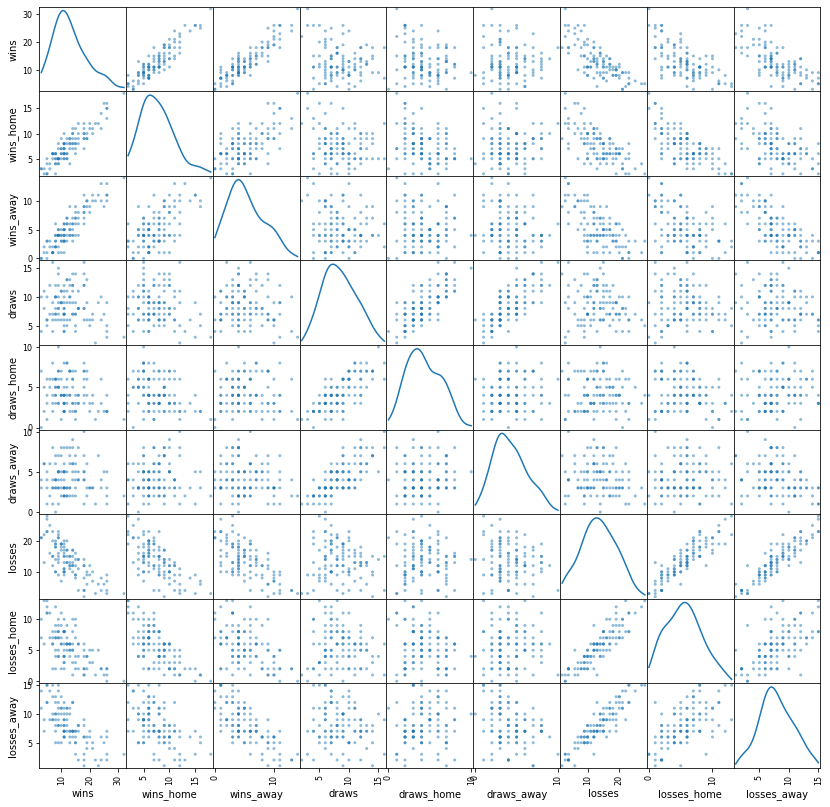

In [20]:
scatter_matrix(df_total[df_total.iloc[:,8:17].columns], diagonal='kde', figsize=(14,14));

## Build the matrix

In [24]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [25]:
df_all

team_name,1. FC Köln,1. FC Union Berlin,1. FSV Mainz 05,BVB 09 Borussia Dortmund,Bayer 04 Leverkusen,Borussia VfL Mönchengladbach,Düsseldorfer TuS Fortuna 1895,Eintracht Frankfurt,FC Augsburg,FC Bayern München,...,Stade Rennais FC,Stade de Reims,Toulouse FC,1. FC Nürnberg,DSC Arminia Bielefeld,Hannoverscher Sportverein 1896,VfB Stuttgart 1893,Hamburger SV,SV Darmstadt 1898,FC Ingolstadt 04
common_name,Köln,Union Berlin,Mainz 05,Borussia Dortmund,Bayer Leverkusen,Borussia M'gladbach,Fortuna Düsseldorf,Eintracht Frankfurt,Augsburg,Bayern München,...,Rennes,Reims,Toulouse,Nürnberg,Arminia Bielefeld,Hannover 96,Stuttgart,Hamburger SV,Darmstadt 98,Ingolstadt
season,2019/2020,2019/2020,2019/2020,2019/2020,2019/2020,2019/2020,2019/2020,2019/2020,2019/2020,2019/2020,...,2019/2020,2019/2020,2019/2020,2018/2019,2019/2020,2018/2019,2018/2019,2017/2018,2016/2017,2016/2017
country,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,...,France,France,France,Germany,Germany,Germany,Germany,Germany,Germany,Germany
matches_played,34,34,34,34,34,34,34,34,34,34,...,28,28,28,34,34,34,34,34,34,34
matches_played_home,17,17,17,17,17,17,17,17,17,17,...,14,14,13,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goals_conceded_min_41_to_50,9,4,11,12,6,5,9,13,7,4,...,5,5,5,5,2,7,10,6,8,7
goals_conceded_min_51_to_60,6,11,4,4,5,8,8,6,10,5,...,2,2,7,10,5,9,7,6,10,4
goals_conceded_min_61_to_70,11,7,5,1,6,0,13,8,6,3,...,2,1,1,10,2,8,11,5,9,5
goals_conceded_min_71_to_80,7,4,6,6,4,3,8,10,9,2,...,3,1,12,8,5,10,9,7,9,9


In [26]:
df_teams_numerical = df_all.iloc[8:,:]

In [27]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [28]:
X = df_norm.to_numpy()

## AA Analysis

In [52]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=10,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 3.548372405293059
RSS = 3.0876525766976264
RSS = 2.9112118367641613
RSS = 2.7849292209394876
RSS = 2.71931216104274
RSS = 2.6954875773942053
RSS = 2.681893940088318
RSS = 2.674377060154999
RSS = 2.6701632234364148
RSS = 2.667717936517821


In [61]:
archetypal.n_archetypes

5

In [53]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

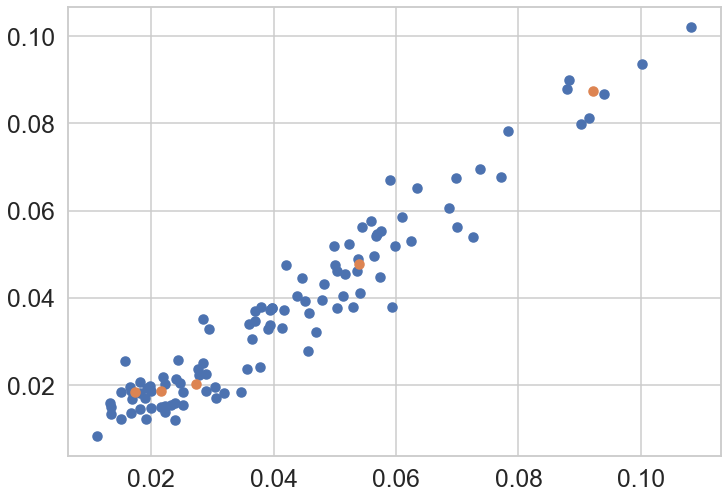

In [54]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

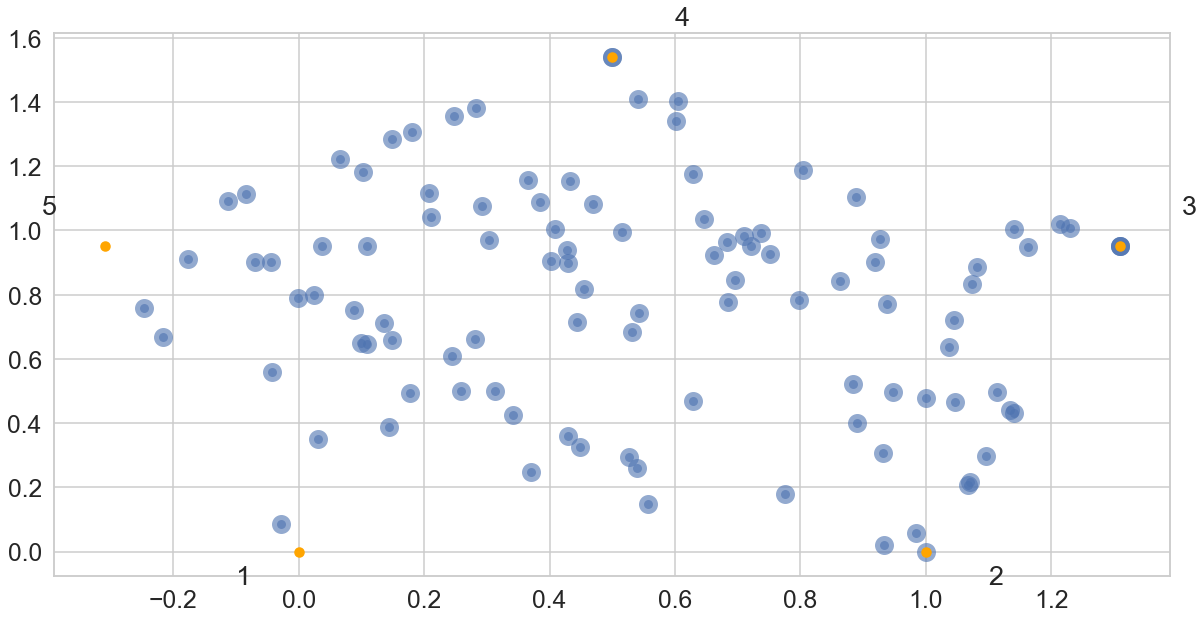

In [55]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [65]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [66]:
for i in range(0,104):
    print("{:40}".format(labels[i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.056 0.000 0.445 0.000 0.498 
1. FC Union Berlin                      0.455 0.024 0.194 0.000 0.327 
1. FSV Mainz 05                         0.000 0.000 0.472 0.075 0.453 
BVB 09 Borussia Dortmund                0.000 0.105 0.061 0.834 0.000 
Bayer 04 Leverkusen                     0.000 0.129 0.033 0.559 0.280 
Borussia VfL Mönchengladbach            0.000 0.141 0.015 0.383 0.460 
Düsseldorfer TuS Fortuna 1895           0.000 0.000 0.745 0.038 0.217 
Eintracht Frankfurt                     0.000 0.000 0.286 0.345 0.369 
FC Augsburg                             0.000 0.126 0.596 0.121 0.157 
FC Bayern München                       0.000 0.000 0.000 1.000 0.000 
FC Schalke 04                           0.000 0.177 0.540 0.003 0.280 
Hertha BSC                              0.316 0.000 0.192 0.000 0.492 
Rasen Ballsport Leipzig                 0.000 0.000 0.180 0.770 0.050 
SC Freiburg                             0.000 0.228 0.149 0.513 0.110 
SC Pad

## Merge Result with original dataframe

In [67]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [68]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [69]:
df_teams_only_aa

,0,1,2,3,4,common_name
0,0.056235,0.000000,0.444895,0.000377,0.498494,Köln
1,0.455017,0.024385,0.194064,0.000022,0.326512,Union Berlin
2,0.000000,0.000000,0.472315,0.074862,0.452824,Mainz 05
3,0.000000,0.105028,0.061373,0.833599,0.000000,Borussia Dortmund
4,0.000000,0.128726,0.033001,0.558627,0.279646,Bayer Leverkusen
...,...,...,...,...,...,...
100,0.000000,0.000000,0.902104,0.097896,0.000000,Hannover 96
101,0.000000,0.000000,0.881705,0.118295,0.000000,Stuttgart
102,0.543654,0.182569,0.272846,0.000000,0.000930,Hamburger SV
103,0.656811,0.000000,0.343145,0.000000,0.000044,Darmstadt 98


## Save Result as Pickle file

In [ ]:
df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")